In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [3]:
def get_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data['Ticker'] = ticker
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data = data.reindex(columns=['Ticker', 'Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return data

In [4]:
data = get_data('AAPL', '2015-01-01', '2024-05-01')

[*********************100%***********************]  1 of 1 completed


In [17]:
data.head()

,Ticker,Date,Year,Month,Day,Open,High,Low,Close,Volume
0,AAPL,2014-12-31,2014,12,31,28.205000,28.282499,27.552500,27.594999,165613600
1,AAPL,2015-01-02,2015,1,2,27.847500,27.860001,26.837500,27.332500,212818400
2,AAPL,2015-01-05,2015,1,5,27.072500,27.162500,26.352501,26.562500,257142000
3,AAPL,2015-01-06,2015,1,6,26.635000,26.857500,26.157499,26.565001,263188400
4,AAPL,2015-01-07,2015,1,7,26.799999,27.049999,26.674999,26.937500,160423600


In [5]:
# version 1
choosen_day = 10
monthly_amount = 500
filtered_data = data
filtered_data['shares'] = 0
filtered_data.loc[filtered_data['Day'] == choosen_day, 'shares'] = monthly_amount // (filtered_data.loc[filtered_data['Day'] == choosen_day, 'Close'])
filtered_data['cost'] = filtered_data['shares'] * filtered_data['Close']
filtered_data['cumulative_shares'] = filtered_data['shares'].cumsum()
filtered_data['amount'] = filtered_data['cumulative_shares'] * filtered_data['Close']
filtered_data['cumulative_cost'] = filtered_data['cost'].cumsum()
filtered_data['return'] = filtered_data['amount'] - filtered_data['cumulative_cost']
filtered_data['return_percent'] = filtered_data['return'] / filtered_data['cumulative_cost'] * 100

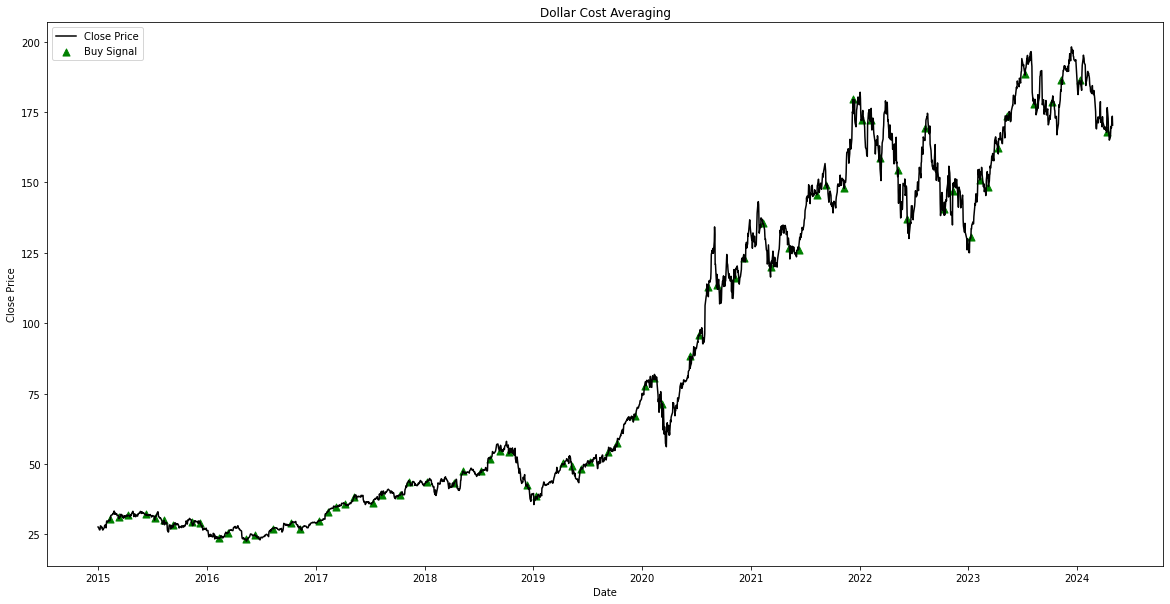

In [23]:
# x-axis is date, y-axis is close price, set green upper arrow for buy signal, set red down arrow for sell signal
plt.figure(figsize=(20, 10))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Close Price', color='black')
plt.scatter(filtered_data[filtered_data['shares'] > 0]['Date'], filtered_data[filtered_data['shares'] > 0]['Close'], marker='^', color='green', label='Buy Signal', s=50)
# plt.scatter(filtered_data[filtered_data['shares'] == 0]['Date'], filtered_data[filtered_data['shares'] == 0]['Close'], marker='v', color='red')
plt.title('Dollar Cost Averaging')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


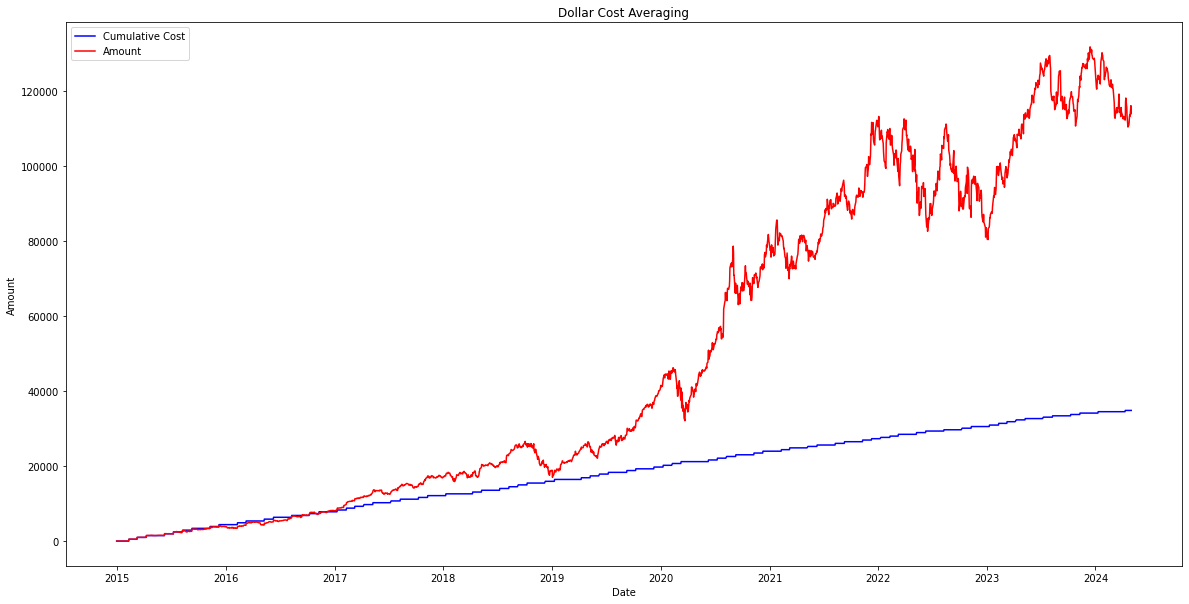

In [24]:
# plot a graphic with x-axis is date, y-axis is cumulative_cost and amount
plt.figure(figsize=(20, 10))
plt.plot(filtered_data['Date'], filtered_data['cumulative_cost'], label='Cumulative Cost', color='blue')
plt.plot(filtered_data['Date'], filtered_data['amount'], label='Amount', color='red')
plt.title('Dollar Cost Averaging')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [7]:
filtered_data.tail()

,Ticker,Date,Year,Month,Day,Open,High,Low,Close,Volume,shares,cost,cumulative_shares,amount,cumulative_cost,return,return_percent
2343,AAPL,2024-04-24,2024,4,24,166.539993,169.300003,166.210007,169.020004,48251800,0,0.0,669,113074.382858,34832.072308,78242.310551,224.627205
2344,AAPL,2024-04-25,2024,4,25,169.529999,170.610001,168.149994,169.889999,50558300,0,0.0,669,113656.409592,34832.072308,78824.337284,226.298156
2345,AAPL,2024-04-26,2024,4,26,169.880005,171.339996,169.179993,169.300003,44838400,0,0.0,669,113261.702042,34832.072308,78429.629734,225.164983
2346,AAPL,2024-04-29,2024,4,29,173.369995,176.029999,173.100006,173.500000,68169400,0,0.0,669,116071.500000,34832.072308,81239.427692,233.231681
2347,AAPL,2024-04-30,2024,4,30,173.330002,174.990005,170.000000,170.330002,65934800,0,0.0,669,113950.771225,34832.072308,79118.698917,227.143244


In [99]:
filtered_data.set_index('Date', inplace=True)

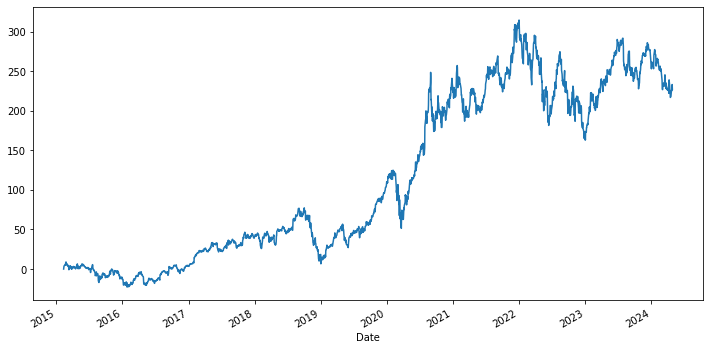

In [106]:
plt.figure(figsize=(12, 6))
filtered_data['return_percent'].plot()
# plt.xticks(ticks=range(0, len(filtered_data), 50), rotation=45)
plt.show()

In [7]:
# version 2
choosen_day = 10
monthly_amount = 500
filtered_data = data[data['Day'] == choosen_day].copy()
filtered_data['shares'] = monthly_amount // filtered_data['Close']
filtered_data['cost'] = filtered_data['shares'] * filtered_data['Close']
filtered_data['cumulative_shares'] = filtered_data['shares'].cumsum()
filtered_data['amount'] = filtered_data['cumulative_shares'] * filtered_data['Close']
filtered_data['cumulative_cost'] = filtered_data['cost'].cumsum()
filtered_data['return'] = filtered_data['amount'] - filtered_data['cumulative_cost']
filtered_data['return_percent'] = filtered_data['return'] / filtered_data['cumulative_cost'] * 100
filtered_data.set_index('Date', inplace=True)

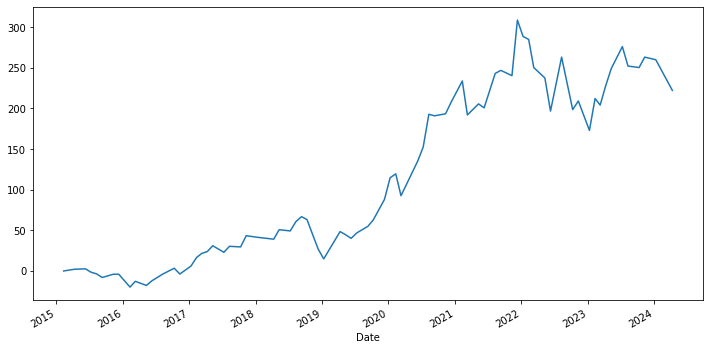

In [8]:
plt.figure(figsize=(12, 6))
filtered_data['return_percent'].plot()
# plt.xticks(ticks=range(0, len(filtered_data), 50), rotation=45)
plt.show()